In [1]:
import mne
import numpy as np
from matplotlib import pyplot as plt
from mne.preprocessing import ICA, corrmap
import argparse
import pandas as pd
import openpyxl

In [2]:
def fix_56(raw):
    # Fix the location of MEG 056, necessary for all data collected at KIT-UMD MEG Lab
    loc = np.array([
        0.09603, -0.07437, 0.00905, -0.5447052, -0.83848277,
        0.01558496, 0., -0.01858388, -0.9998273, 0.8386276,
        -0.54461113, 0.01012274])
    index = raw.ch_names.index('MEG 056')
    raw.info['chs'][index]['loc'] = loc
    return raw

In [3]:
sub = 'R3254'
condition = 'B'

In [4]:
comp_condition = 'X'
prod_condition = 'X'
if condition == 'A' or 'D':
    comp_condition = 'A1'
    prod_condition = 'B1'
elif condition == 'B' or 'C':
    comp_condition = 'B1'
    prod_condition = 'A1'
elif condition == 'E' or 'H':
    comp_condition = 'A2'
    prod_condition = 'B2'
elif condition == 'F' or 'G':
    comp_condition = 'B2'
    prod_condition = 'A2'

In [5]:
input_dir = '/Users/audreylaun/Library/CloudStorage/Box-Box/Starling/Experiment1/MEG_data/' + sub + '/'
output_dir = '/Users/audreylaun/Library/CloudStorage/Box-Box/Starling/Experiment1/MEG_data/Testing/' + sub + '/'

In [6]:
bads = ['MEG 056', 'MEG 086']

In [7]:
comp_raw_fname = input_dir + sub + '_comp-raw.fif'
prod_raw_fname = input_dir + sub + '_prod-raw.fif'
empty_room_fname = input_dir + '/DAQ/' + sub + '_emptyroom.sqd'

comp_raw = mne.io.read_raw_fif(comp_raw_fname, preload = True)
prod_raw = mne.io.read_raw_fif(prod_raw_fname, preload = True)
empty_room_raw = mne.io.read_raw_kit(empty_room_fname, preload = True)
empty_room_raw = mne.io.RawArray(empty_room_raw.get_data(), comp_raw.info)

comp_raw = fix_56(comp_raw)
pro_raw = fix_56(prod_raw)
empty_room_raw = fix_56(empty_room_raw)

noisy_chs, flat_chs = mne.preprocessing.find_bad_channels_maxwell(
    comp_raw, ignore_ref=True
)
for i in bads:
    if i not in noisy_chs:
        noisy_chs.append(i)

comp_raw.info['bads'] = noisy_chs
prod_raw.info['bads'] = noisy_chs
empty_room_raw.info['bads'] = noisy_chs



Opening raw data file /Users/audreylaun/Library/CloudStorage/Box-Box/Starling/Experiment1/MEG_data/R3254/R3254_comp-raw.fif...
    Range : 0 ... 886999 =      0.000 ...   886.999 secs
Ready.
Reading 0 ... 886999  =      0.000 ...   886.999 secs...
Opening raw data file /Users/audreylaun/Library/CloudStorage/Box-Box/Starling/Experiment1/MEG_data/R3254/R3254_prod-raw.fif...
    Range : 0 ... 886999 =      0.000 ...   886.999 secs
Ready.
Reading 0 ... 886999  =      0.000 ...   886.999 secs...
Extracting SQD Parameters from /Users/audreylaun/Library/CloudStorage/Box-Box/Starling/Experiment1/MEG_data/R3254//DAQ/R3254_emptyroom.sqd...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Reading 0 ... 119999  =      0.000 ...   119.999 secs...
Ready.
Creating RawArray with float64 data, n_channels=193, n_times=120000
    Range : 0 ... 119999 =      0.000 ...   119.999 secs
Ready.
Applying low-pass filter with 40.0 Hz cutoff frequency ...
Filtering raw d

In [8]:
comp_raw_tsss = mne.preprocessing.maxwell_filter(
    comp_raw,
    st_duration=10,
    ignore_ref=True,
    st_correlation=0.9,
    st_only=True
    )

prod_raw_tsss = mne.preprocessing.maxwell_filter(
    prod_raw,
    st_duration=10,
    ignore_ref=True,
    st_correlation=0.9,
    st_only=True
    )

empty_room_raw_tsss = mne.preprocessing.maxwell_filter(
    empty_room_raw,
    st_duration=10,
    ignore_ref=True,
    st_correlation=0.9,
    st_only=True
    )

Maxwell filtering raw data
    Bad MEG channels being reconstructed: ['MEG 056', 'MEG 086']
    Processing 0 gradiometers and 157 magnetometers (of which 157 are actually KIT gradiometers)
    Automatic origin fit: head of radius 87.7 mm
    Using origin -2.8, 6.8, 51.6 mm in the head frame
    Processing data using tSSS with st_duration=10.0
    Using loaded raw data
        Using 83/95 harmonic components for    0.000  (71/80 in, 12/15 out)
    Processing   88 data chunks of (at least) 10.0 s with 0.0 s overlap and boxcar windowing
    The final 7.0 s will be lumped into the final window
        Using 83/95 harmonic components for    0.000  (71/80 in, 12/15 out)
        Projecting  7 intersecting tSSS components for    0.000 -    9.999 s
        Projecting  4 intersecting tSSS components for   10.000 -   19.999 s
        Projecting  4 intersecting tSSS components for   20.000 -   29.999 s
        Projecting  5 intersecting tSSS components for   30.000 -   39.999 s
        Projecting 

In [11]:
comp_raw_tsss.plot()

Using pyopengl with version 3.1.9


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)

Fitting ICA to data using 155 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 18.0s.
Creating RawArray with float64 data, n_channels=30, n_times=887000
    Range : 0 ... 886999 =      0.000 ...   886.999 secs
Ready.
Using pyopengl with version 3.1.9


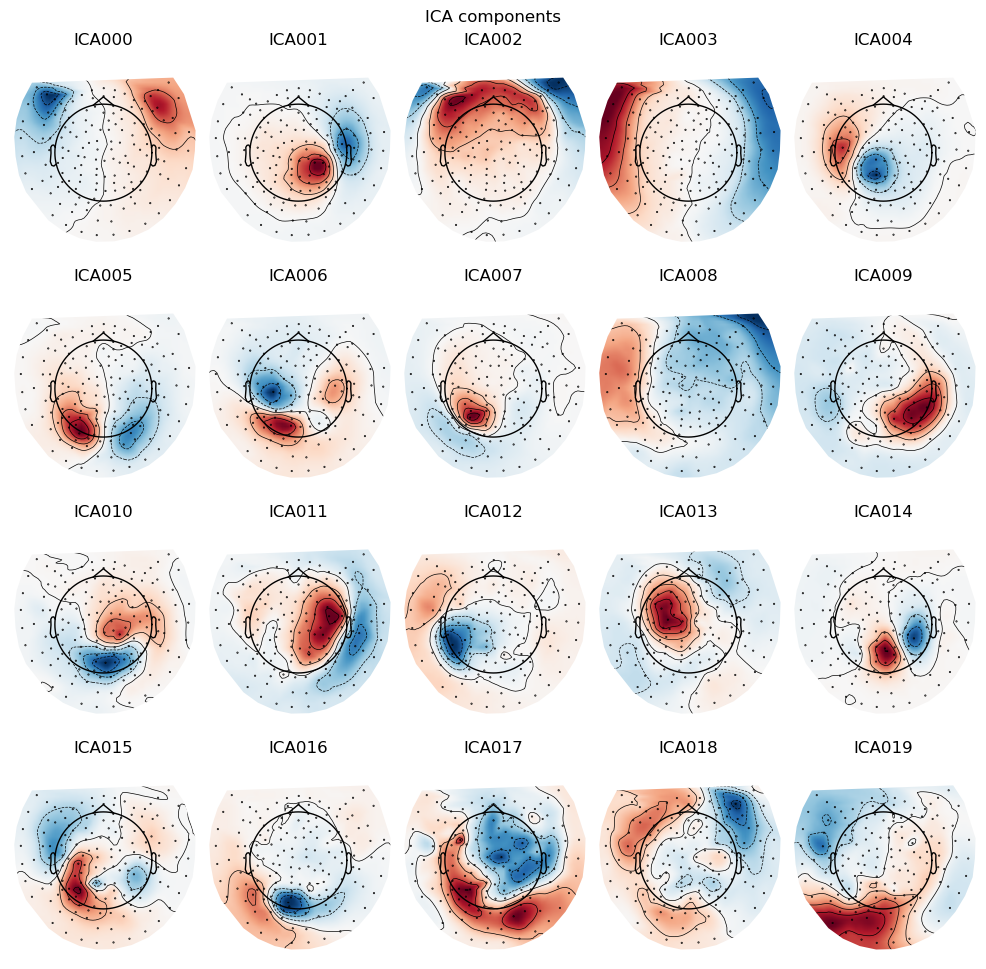

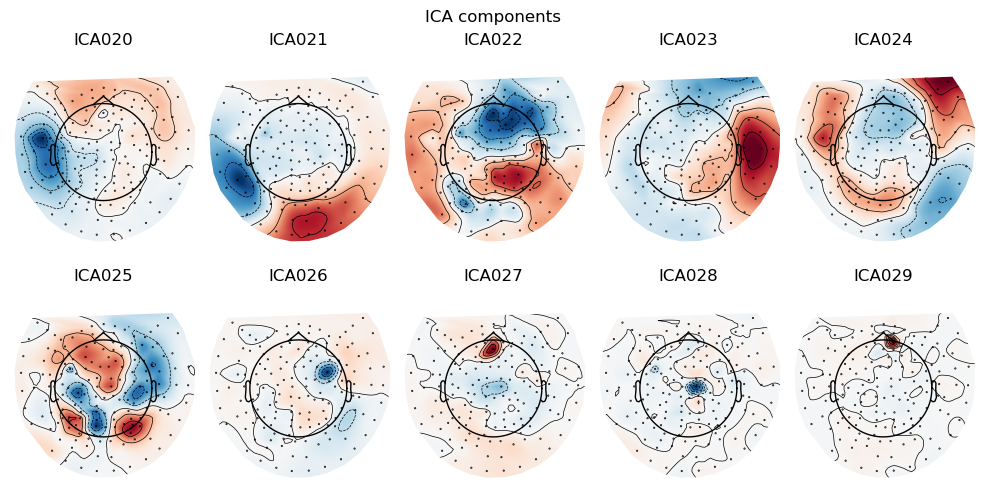

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x496 with 10 Axes>]

In [10]:
comp_raw_tsss_filt = comp_raw_tsss.copy().filter(l_freq=1.0, h_freq=None)
ica = ICA(n_components=30, max_iter="auto")
ica.fit(comp_raw_tsss_filt)

ica.plot_sources(comp_raw_tsss, show_scrollbars=True)
ica.plot_components()

In [12]:
ica_excluded = [0,2,3,8]

ica.exclude = ica_excluded

ica.apply(comp_raw_tsss)

comp_raw_tsss.plot()

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 4 ICA components
    Projecting back using 155 PCA components
Using pyopengl with version 3.1.9


Channels marked as bad:
['MEG 056', 'MEG 086']
Channels marked as bad:
['MEG 056', 'MEG 086']
